In [39]:
pip install Standardscaler

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install sklearn.preprocessing

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.preprocessing (from versions: none)
ERROR: No matching distribution found for sklearn.preprocessing


In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [42]:
data=pd.read_csv('data.csv')


In [43]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [44]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

In [45]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
M=data[data.diagnosis=="M"]
B=data[data.diagnosis=="B"]

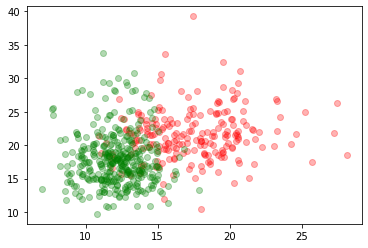

In [47]:
import matplotlib.pyplot as plt
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="Kötü",alpha=0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="İyi",alpha=0.3)

In [48]:
data.diagnosis=[1 if each=="M" else 0 for each in data.diagnosis] 

In [49]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
x=data.drop(["diagnosis"],axis=1)
y=data.diagnosis.values

In [51]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [53]:
ann=tf.keras.models.Sequential() 

In [54]:
ann.add(tf.keras.layers.Dense(15,activation="relu",input_dim=30))  

In [55]:
ann.add(tf.keras.layers.Dense(15,activation="relu")) 

In [56]:
ann.add(tf.keras.layers.Dense(1,activation="sigmoid")) 

In [57]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [58]:
ann.fit(x_train,y_train,epochs=100)

Epoch 1/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7716 - accuracy: 0.6220
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.6637
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.8044
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8462
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.8945
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2705 - accuracy: 0.9165
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2348 - accuracy: 0.9275
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9407
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9385
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1633 - accuracy: 0.9495
Epoch 11/

15/15 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9978
Epoch 84/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9956
Epoch 85/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9956
Epoch 86/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9956
Epoch 87/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9956
Epoch 88/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9978
Epoch 89/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 90/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 91/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 92/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 93/100


In [59]:
y_pred=ann.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [60]:
y_pred=(y_pred>0.5)

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[69  2]
 [ 1 42]]


0.9736842105263158

In [65]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

